# PRODUCTS

**A. CLEAN UP AND PREPARE PRODUCT DATA**

A.1 Load and plot

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt

import os

In [2]:
os.getcwd()

'/Users/lou/Documents/Travail/master 2/ADA/epfl-ada-2019-project-bubble582/code'

In [3]:
#load the data
hh_demographic = pd.read_csv('../data/dunnhumby_complete_csv/hh_demographic.csv', sep = ',')

transaction_data = pd.read_csv('../data/dunnhumby_complete_csv/transaction_data.csv', sep = ',')

product = pd.read_csv('../data/dunnhumby_complete_csv/product.csv', sep = ',')

In [4]:
product.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


First we get interested by the different departments in the commercial center. We reorder the departments and plot the number of products we can find per department. 

In [5]:
# REORDERING PART
ordered_manufacturer= product.MANUFACTURER.astype(int).sort_values()
ordered_manufacturer= ordered_manufacturer.unique()

product['MANUFACTURER'] = pd.Categorical(product['MANUFACTURER'],
                      ordered = True,
                      categories = ordered_manufacturer)

print ('The order of the manufacturer categories is :', ordered_manufacturer)

The order of the manufacturer categories is : [   1    2    3 ... 6475 6476 6477]


In [6]:
ordered_department= ['GROCERY','FROZEN GROCERY','GRO BAKERY','PASTRY',
        'SEAFOOD','SEAFOOD-PCKGD','MEAT', 'MEAT-PCKGD','MEAT-WHSE','PORK','SPIRITS','NUTRITION',
       'PRODUCE','CHEF SHOPPE','RESTAURANT','SALAD BAR','DELI', 'DAIRY DELI','DELI/SNACK BAR',
    'DRUG GM','COSMETICS','PHARMACY SUPPLY','GARDEN CENTER','FLORAL', 'TRAVEL & LEISUR', 
    'POSTAL CENTER', 'PHOTO', 'VIDEO','VIDEO RENTAL','TOYS','HOUSEWARES', 
    'KIOSK-GAS', 'ELECT &PLUMBING','AUTOMOTIVE','GM MERCH EXP','COUP/STR & MFG', 
     'CHARITABLE CONT', 'RX','PROD-WHS SALES', 'HBC','CNTRL/STORE SUP','MISC. TRANS.', 'MISC SALES TRAN',' ']

product['DEPARTMENT'] = pd.Categorical(product['DEPARTMENT'],
                      ordered = True,
                      categories = ordered_department)

print ('The order of the department categories is :', ordered_department)

The order of the department categories is : ['GROCERY', 'FROZEN GROCERY', 'GRO BAKERY', 'PASTRY', 'SEAFOOD', 'SEAFOOD-PCKGD', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE', 'PORK', 'SPIRITS', 'NUTRITION', 'PRODUCE', 'CHEF SHOPPE', 'RESTAURANT', 'SALAD BAR', 'DELI', 'DAIRY DELI', 'DELI/SNACK BAR', 'DRUG GM', 'COSMETICS', 'PHARMACY SUPPLY', 'GARDEN CENTER', 'FLORAL', 'TRAVEL & LEISUR', 'POSTAL CENTER', 'PHOTO', 'VIDEO', 'VIDEO RENTAL', 'TOYS', 'HOUSEWARES', 'KIOSK-GAS', 'ELECT &PLUMBING', 'AUTOMOTIVE', 'GM MERCH EXP', 'COUP/STR & MFG', 'CHARITABLE CONT', 'RX', 'PROD-WHS SALES', 'HBC', 'CNTRL/STORE SUP', 'MISC. TRANS.', 'MISC SALES TRAN', ' ']


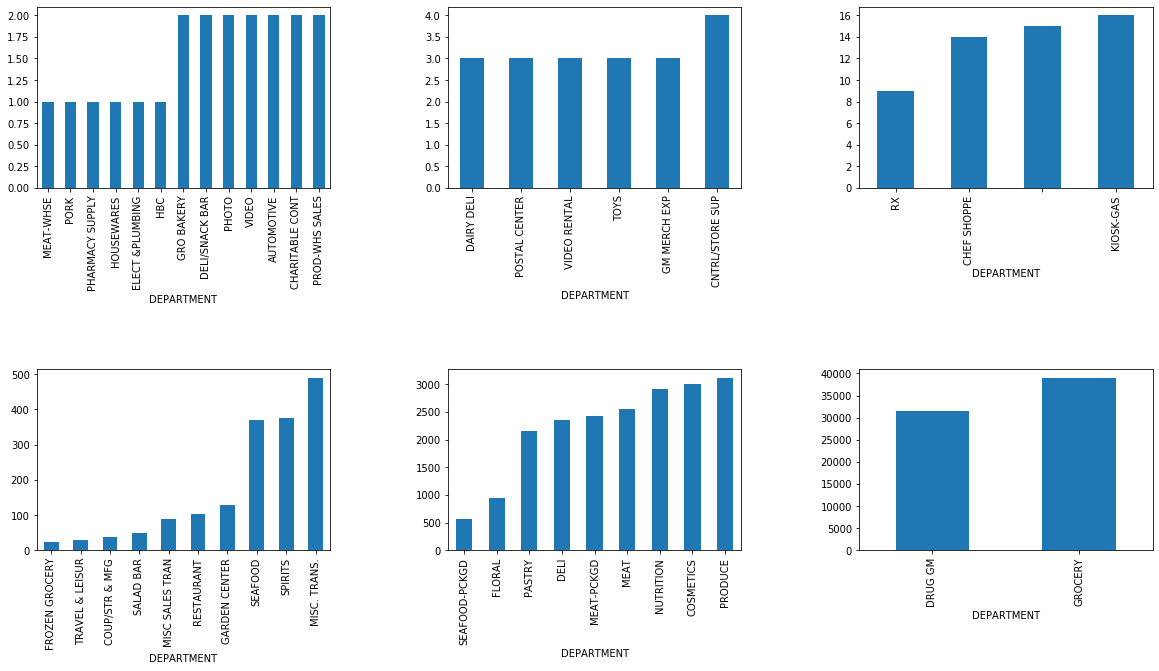

In [7]:
department= product.groupby(['DEPARTMENT']).count()

#PLOT THE NUMBER OF PRODUCTS PER DEPARTMENT

fig = plt.figure(figsize=(20,10))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(231)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(232)

ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)

ax5 = fig.add_subplot(235)

ax6 = fig.add_subplot(236)

department[(department.BRAND>0) & (department.BRAND<=2)].BRAND.sort_values().plot.bar(ax=ax1)
department[(department.BRAND>2) & (department.BRAND<=5)].BRAND.sort_values().plot.bar(ax=ax2)
department[(department.BRAND>5) & (department.BRAND<=20)].BRAND.sort_values().plot.bar(ax=ax3)
department[(department.BRAND>20) & (department.BRAND<=500)].BRAND.sort_values().plot.bar(ax=ax4)
department[(department.BRAND>500) & (department.BRAND<=4000)].BRAND.sort_values().plot.bar(ax=ax5)
department[department.BRAND>4000].BRAND.sort_values().plot.bar(ax=ax6)

fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.4)


As we can see in the previous barplots, the departments with the highest number of referenced products in this study are the grocery with almost 40000 products, and the drug GM (which is probably a drug store) with more than 30000 products. We are going to focus on these 2 mains stores in a first time.

**A. GROCERY DATA PREPROCESSING**

In this part we are interested to clean up and categorize the different products from the grocery store. We want to explain what purpose they serve (food, sanitary & hygien products, pet products). We create a special Grocery dataframe for this purpose.

In [9]:
#we extract the grocery product data which is the main supermarket in the commercial center
Grocery= pd.DataFrame(product[product['DEPARTMENT'] == 'GROCERY'])
Grocery.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ
6,26540,69,GROCERY,Private,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,16 OZ


The only product descriptions provided by the Grocery data are few words description found in COMMODITY_DESC and SUB_COMMODITY_DESC columns. These descriptions are not standardized, no categories arise from them. In a first time, we extract and class the description words in different categories (food, sanitary, pet or other).

In [26]:
# We create a table where all description words are extracted and separated as word 1, word 2, word 3 ... 
#from the same description line. Here we look at the words in COMMODITY_DESC

split = Grocery['COMMODITY_DESC'].str.split(' |\/').tolist()
words = pd.DataFrame.from_records(split, index= Grocery.index, columns=["w1","w2","w3","w4","w5","w6"])

# we show the number of occurrence for each first word. For example the word AIR occures 414 times as the first 
#word of a description

words.groupby('w1').count()

,w2,w3,w4,w5,w6
w1,,,,,
AIR,414,0,0,0,0
BAG,1523,0,0,0,0
BAKED,1851,1851,1169,0,0
BAKING,1097,0,0,0,0
BATH,185,0,0,0,0
...,...,...,...,...,...
TEAS,0,0,0,0,0
VEGETABLES,831,831,831,0,0
WAREHOUSE,298,0,0,0,0


In [27]:
# here are all the unique first words 
words.w1.unique()

array(['FRZN', 'FRUIT', 'COOKIES', 'SPICES', 'PNT', 'ICE', 'AIR',
       'CHEESE', 'SHORTENING', 'COFFEE', 'PAPER', 'BAKED', 'VEGETABLES',
       'HISPANIC', 'DINNER', 'CONDIMENTS', 'BAKING', 'HOUSEHOLD', 'FD',
       'DRY', 'PICKLE', 'FLUID', 'SOUP', 'FACIAL', 'FROZEN', 'EGGS',
       'REFRGRATD', 'HOT', 'COLD', 'SUGARS', 'SEAFOOD', 'CANNED', 'BAG',
       'BEANS', 'CRACKERS', 'CONVENIENT', 'SOFT', 'BUTTER', 'WATER',
       'MILK', 'LAUNDRY', 'ISOTONIC', 'TEAS', 'PASTA', 'CAT', 'MOLASSES',
       'BATH', 'MEAT', 'SALD', 'LIQUOR', 'SNACK', 'BEERS', 'YOGURT',
       'DOG', 'WAREHOUSE', 'MARGARINES', 'PWDR', 'OLIVES', 'MISC.',
       'COCOA', 'FLOUR', 'SYRUPS', 'BLEACH', 'DISHWASH', 'DOMESTIC',
       'MISC', 'PET', 'COUPON', 'IMPORTED', 'RESTRICTED', 'BIRD', 'NEW',
       'BOTTLE'], dtype=object)

Once we have extracted these first words of the descriptions, we assign them to the different categories.

In [28]:
FoodW1 = ['FRZN', 'FRUIT', 'COOKIES', 'SPICES','CHEESE','COFFEE','BAKED', 'VEGETABLES','CONDIMENTS', 'BAKING',
    'PICKLE','SOUP','FROZEN', 'EGGS','REFRGRATD', 'HOT', 'COLD', 'SUGARS', 'SEAFOOD','CANNED','BEANS', 'CRACKERS',
     'BUTTER', 'WATER','MILK','TEAS', 'PASTA', 'MOLASSES','MEAT', 'SALD', 'LIQUOR', 'SNACK', 'BEERS', 'YOGURT',
    'COCOA', 'FLOUR', 'SYRUPS','OLIVES','ISOTONIC']
        
OtherW1 = ['ICE','PNT','AIR','SHORTENING','PAPER','HISPANIC','DINNER','HOUSEHOLD','FD','DRY','FLUID','BAG',
         'CONVENIENT', 'SOFT','WAREHOUSE','PWDR','MISC.','BLEACH','DOMESTIC',
       'MISC', 'COUPON', 'IMPORTED', 'RESTRICTED', 'NEW','BOTTLE']        

PetW1 = ['CAT','DOG','PET','BIRD']

SanitaryW1 = ['FACIAL','LAUNDRY','BATH','DISHWASH']


Then we reproduce it for the second and third words of the descriptions. The descriptions can have up to 6 words but the 3 first words are sufficient to determine the product category.

In [14]:
words.w2.unique()

array(['ICE', '-', 'CONES', '&', 'BTR', 'CREAM', 'CARE', None, 'OIL',
       'HOUSEWARES', 'BREAD', 'MXS:DRY', 'SAUCES', 'VEGETABLE', 'NEEDS',
       'FRUITS', 'CLEANG', 'WRAPS', 'MIX', 'RELISH', 'MIXES', 'MILK',
       'SWEET', 'BN', 'TISS', 'PIZZA', 'DOUGH', 'CEREAL', 'SWEETNERS',
       'JUICES', 'SNACKS', 'MISC', 'BRKFST', 'DRINKS', 'MEAT',
       'BREAKFAST', 'BY-PRODUCTS', 'DETERGENTS', 'JCE', 'ADDITIVES',
       'NOODLES', 'SAUCE', 'FOOD', 'SYRUP', 'TISSUES', 'PIE', 'DRSNG',
       'NUTS', 'ALES', 'FOODS', 'NOVELTIES', 'CRYSTL', 'DAIRY',
       'TOPPINGS', 'TOWELS', 'POTATOES', 'LITTER', 'CHICKEN', 'WINE',
       'DIET', 'SEED', 'SEAFOOD', 'AGE', 'DEPOSITS'], dtype=object)

In [15]:
FoodW2 = ['BREAD','SAUCES', 'VEGETABLE','FRUITS', 'WRAPS','SWEET','RELISH','PIZZA', 'DOUGH', 'CEREAL', 
        'SWEETNERS', 'JUICES', 'SNACKS','BRKFST', 'DRINKS', 'MEAT','NOODLES', 'SAUCE', 'FOOD', 'SYRUP','PIE',
        'NUTS', 'ALES','FOODS','BREAKFAST','DAIRY','TOPPINGS','POTATOES','CHICKEN', 'WINE','DIET', 'SEED', 
        'SEAFOOD']

OtherW2 =['ICE', '-', 'CONES', '&', 'BTR', 'CREAM','OIL','HOUSEWARES','MXS:DRY','NEEDS','MIX', 
          'MIXES','BN', 'TISS','MISC','BY-PRODUCTS','JCE', 'ADDITIVES','DRSNG','NOVELTIES', 'CRYSTL', 'AGE', 
          'DEPOSITS']

SanitaryW2=['CARE','CLEANG','DETERGENTS','TISSUES','TOWELS','LITTER']

In [16]:
words.w3.unique()

array([None, 'SHELF', 'EXTRACTS', 'JELLY', 'MILK', 'BUNS', 'VEG', 'NEEDS',
       'BAGS', 'DESSERTS', 'PKLD', 'PRODUCTS', 'GOODS', 'DNR', 'CANNED',
       'BKD', 'WHLSM', 'MEAT', 'CARBONATED', 'FOODS', 'CONC', 'PASTA',
       'PANCAKE', 'SNDWCH', 'DOUGH', 'DRNKS', 'WTR', 'GRAVY', 'DRNK',
       'MEALS', 'SUPPLIES', 'ITEMS'], dtype=object)

In [17]:
FoodW3 = ['JELLY', 'MILK', 'BUNS', 'VEG','DESSERTS', 'CANNED','MEAT','FOODS','PASTA',
       'PANCAKE', 'SNDWCH', 'DOUGH', 'DRNKS', 'WTR', 'GRAVY', 'DRNK',
       'MEALS']

OtherW3 =['SHELF', 'EXTRACTS','NEEDS',
       'BAGS','PKLD', 'PRODUCTS', 'GOODS', 'DNR','BKD', 'WHLSM','CARBONATED','CONC','SUPPLIES', 'ITEMS']

In [18]:
#Initialize the categories to the grocery dataframe

Grocery['IsFood'] = False
Grocery['IsPet'] = False
Grocery['IsSanitary'] = False
Grocery['IsOther'] = False

For each word in the words dataframe we check to which category the word belongs. A boolean is turned as True in the column of their category.
We do this for each first word, then each second word, and finally for each third word. It is possible that first word belongs to a category and second word belongs to another category for example. It will be fixed when filling the grocery dataframe with the categories for each product.

In [29]:
words['IsFoodW1'] = words.w1.isin(FoodW1)
words['IsSanitaryW1'] = words.w1.isin(SanitaryW1)
words['IsPetW1'] = words.w1.isin(PetW1)
words['IsOtherW1'] = words.w1.isin(OtherW1)

words['IsFoodW2'] = words.w2.isin(FoodW2)
words['IsSanitaryW2'] = words.w2.isin(SanitaryW2)
words['IsOtherW2'] = words.w2.isin(OtherW2)

words['IsFoodW3'] = words.w3.isin(FoodW3)
words['IsOtherW3'] = words.w3.isin(OtherW3)

In [30]:
# We look at the words dataframe after filling with word's categories
words.head()

,w1,w2,w3,w4,w5,w6,IsFoodW1,IsSanitaryW1,IsPetW1,IsOtherW1,IsFoodW2,IsSanitaryW2,IsOtherW2,IsFoodW3,IsOtherW3
0,FRZN,ICE,None,None,None,None,True,False,False,False,False,False,True,False,False
3,FRUIT,-,SHELF,STABLE,None,None,True,False,False,False,False,False,True,False,True
4,COOKIES,CONES,None,None,None,None,True,False,False,False,False,False,True,False,False
5,SPICES,&,EXTRACTS,None,None,None,True,False,False,False,False,False,True,False,True
6,COOKIES,CONES,None,None,None,None,True,False,False,False,False,False,True,False,False


Finally we create a loop to assign the right categorie to each product in the grocery dataframe.

In [31]:
# a loop to check if we have non concordance. Everything seems fine. With looking at the three first words 
# we can determine the type of product : food, pet, sanitary or other.

#uncomment to check :

#for i in words.index : 
#    if (words['IsOtherW1'].loc[i]) and (words['IsOtherW2'].loc[i]) and (words['IsOtherW3'].loc[i]) :
#        print(words.loc[i])

In [32]:
#now we need to fill the Grocery table with the type of elements :

for i in Grocery.index : 
    if (words['IsOtherW1'].loc[i]) and (words['IsOtherW2'].loc[i]) and (words['IsOtherW3'].loc[i]) :
        Grocery.IsFood.loc[i] = False
        Grocery.IsPet.loc[i] = False
        Grocery.IsSanitary.loc[i] = False
        Grocery.IsOther.loc[i] = True
        
    elif (words['IsPetW1'].loc[i]) :
        Grocery.IsFood.loc[i] = False
        Grocery.IsPet.loc[i] = True
        Grocery.IsSanitary.loc[i] = False
        Grocery.IsOther.loc[i] = False
    
    elif (words['IsFoodW1'].loc[i]) or (words['IsFoodW2'].loc[i]) or (words['IsFoodW3'].loc[i]) :
        Grocery.IsFood.loc[i] = True
        Grocery.IsPet.loc[i] = False
        Grocery.IsSanitary.loc[i] = False
        Grocery.IsOther.loc[i] = False
        
    elif (words['IsSanitaryW1'].loc[i]) or (words['IsSanitaryW2'].loc[i]):
        Grocery.IsFood.loc[i] = False
        Grocery.IsPet.loc[i] = False
        Grocery.IsSanitary.loc[i] = True
        Grocery.IsOther.loc[i] = False

In [34]:
Grocery.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,IsFood,IsPet,IsSanitary,IsOther
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB,True,False,False,False
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,True,False,False,False
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ,True,False,False,False
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ,True,False,False,False


In [41]:
Grocery.groupby('IsFood').count()
Grocery.groupby('IsPet').count()
Grocery.groupby('IsSanitary').count()
Grocery.groupby('IsOther').count()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,IsFood,IsPet,IsSanitary
IsOther,,,,,,,,,,
False,39004,39004,39004,39004,39004,39004,39004,39004,39004,39004
True,17,17,17,17,17,17,17,17,17,17


As shown above with groupBy function, the category with the highest number of products is the Food category, with 31886 products. We find 1887 for the pet products, and 2074 sanitary products (hygien and cleaning). Only 17 products are classified as other.

In [51]:
Grocery.to_csv('Grocery.csv')

**B. LET'S DO IT AGAIN WITH DRUG GM**

In [42]:
#we extract the drug gm product data which is the second main store in the commercial center
DrugGM= pd.DataFrame(product[product['DEPARTMENT'] == 'DRUG GM'])
DrugGM.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
7,26601,69,DRUG GM,Private,VITAMINS,VITAMIN - MINERALS,300CT(1)
11,26889,32,DRUG GM,National,MAGAZINE,TV/MOVIE-MAGAZINE,
20,27334,69,DRUG GM,Private,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,
108,29574,69,DRUG GM,Private,STATIONERY & SCHOOL SUPPLIES,SCHOOL SUPPLIES,1 CT
110,29618,69,DRUG GM,Private,COLD AND FLU,COLD AND FLU - PSE,10 OZ


In [46]:
# We create a table where all description words are extracted and separated as word 1, word 2, word 3 ... 
#from the same description line. Here we look at the words in COMMODITY_DESC

split = DrugGM['COMMODITY_DESC'].str.split(' |\/').tolist()
wordsDGM= pd.DataFrame.from_records(split, index= DrugGM.index, columns=["w1","w2","w3","w4","w5"])

# we show the number of occurrence for each first word. For example the word AIR occures 414 times as the first 
#word of a description

wordsDGM.groupby('w1').count()

,w2,w3,w4,w5
w1,,,,
ADULT,55,0,0,0
ANALGESICS,0,0,0,0
ANTACIDS,0,0,0,0
APPAREL,0,0,0,0
AUDIO,513,513,0,0
...,...,...,...,...
TOBACCO,91,0,0,0
TOYS,841,841,0,0
VALENTINE,0,0,0,0


In [47]:
wordsDGM.w1.unique()

array(['VITAMINS', 'MAGAZINE', 'DIETARY', 'STATIONERY', 'COLD', 'BABY',
       'SOAP', 'KITCHEN', 'CANDY', 'HAIR', 'SHAVING', 'FIRST',
       'NEWSPAPER', 'INSECTICIDES', 'ELECTRICAL', 'IRONING', 'ANALGESICS',
       'HOSIERY', 'BATTERIES', 'BOOKSTORE', 'SPRING', 'CHARCOAL', 'HAND',
       'ORAL', 'INFANT', 'DEODORANTS', 'FEMININE', 'COFFEE', 'BROOMS',
       'GREETING', 'HARDWARE', 'ANTACIDS', 'CIGARETTES', 'SINUS',
       'TOBACCO', 'FILM', 'PLASTIC', 'FOOT', 'SHOE', 'FIREWORKS',
       'SUNTAN', 'CANDLES', 'COOKWARE', 'DISPOSIBLE', 'AUDIO', 'EYE',
       'AUTOMOTIVE', 'LAXATIVES', 'OVERNIGHT', 'PERSONAL', 'DIAPERS',
       'SMOKING', 'COUPON', 'J-HOOKS', 'FAMILY', 'EASTER', 'CIGARS',
       'APPAREL', 'PREPAID', 'HOME', 'IN-STORE', 'ADULT', 'DOMESTIC',
       'FALL', 'TOYS', 'LAWN', 'GLASSWARE', 'HALLOWEEN', 'SEWING',
       'NATURAL', 'ETHNIC', 'GLASSES', 'CHRISTMAS', 'CONTINUITIES',
       'PORTABLE', 'VALENTINE', 'PROPANE', 'WATCHES', 'TICKETS',
       'MISCELLANEOUS', 'DOLLAR', 

In [58]:

SmallStuffW1 = ['ELECTRICAL','BATTERIES','CHARCOAL','HARDWARE','FILM', 
          'FIREWORKS','CANDLES' 'APPAREL', 'TOYS', 'GLASSWARE','HOSIERY','SHOE','COOKWARE',
        'GLASSES','PROPANE', 'WATCHES', 'TICKETS','CANDY','COFFEE']        

OtherW1 = ['FIRST','KITCHEN','COLD','BABY', 'FEMININE','DIETARY','SPRING', 'HAND','ORAL', 'INFANT','PLASTIC', 
           'FOOT','DISPOSIBLE', 'AUDIO', 'EYE', 'AUTOMOTIVE','OVERNIGHT', 'PERSONAL','LAWN', 'HALLOWEEN', 'SEWING',
           'COUPON', 'J-HOOKS', 'FAMILY', 'EASTER','PREPAID', 'HOME', 'IN-STORE', 'ADULT', 'DOMESTIC',
       'FALL','NATURAL', 'ETHNIC', 'CHRISTMAS', 'CONTINUITIES','PORTABLE', 'VALENTINE','MISCELLANEOUS', 'DOLLAR', 
           'FRAGRANCES', 'SPORTS', 'LONG', 'FD']

SmokeW1 = ['CIGARETTES','TOBACCO','SMOKING','CIGARS']

StationneryW1 = ['MAGAZINE','STATIONERY','NEWSPAPER', 'BOOKSTORE', 'GREETING']

PharmacyW1 = ['VITAMINS','ANALGESICS','LAXATIVES']


SanitaryW1 = ['SOAP','HAIR', 'SHAVING', 'INSECTICIDES','IRONING','DEODORANTS', 'BROOMS', 'ANTACIDS','SINUS', 
              'SUNTAN', 'DIAPERS']


In [53]:
wordsDGM.w2.unique()

array([None, 'AID', '&', 'AND', 'HBC', '-', 'GADGETS', 'CARE',
       'SUPPPLIES', 'SOCKS', 'SUMMER', 'BODY', 'HYGIENE', 'FORMULA',
       'FILTERS', 'CARDS', 'SUPPLIES', 'FOODS', 'OTHER', 'HOUSEWARES',
       'ACCESSORIES', 'FOILWARE', 'VIDEO', 'PRODUCTS', 'PHOTOFINISHING',
       'CESSATIONS', 'MISC', 'PLANNING', 'WIRELESS&ACCESSORIES',
       'FREEZING', 'INCONTINENCE', 'GOODS', 'PERSONAL', 'VISION', '',
       'ELECTRIC', 'FURNISHINGS', 'CALCULATORS', 'HEALTH', 'VALUE',
       'MEMORABLILIA', 'DISTANCE', 'WRAPS'], dtype=object)

In [59]:
SmallStuffW1 = ['GADGETS','SUPPPLIES', 'SOCKS', 'CARDS','FOODS','HOUSEWARES','ACCESSORIES', 'FOILWARE','VIDEO',
                'WIRELESS&ACCESSORIES','ELECTRIC','FURNISHINGS',  'CALCULATORS',]        

OtherW1 = ['AID', '&', 'AND', 'HBC', '-','SUMMER','FORMULA','OTHER',  'PRODUCTS', 'PHOTOFINISHING',
       'CESSATIONS', 'MISC', 'PLANNING', 'FREEZING','GOODS', 'PERSONAL', 'VISION','VALUE',
       'MEMORABLILIA', 'DISTANCE', 'WRAPS']

SmokeW1 = ['FILTERS',]

StationneryW1 = []

PharmacyW1 = ['INCONTINENCE',]


SanitaryW1 = [ 'CARE','BODY', 'HYGIENE', 'SUPPLIES','HEALTH', ]
    

In [63]:
wordsDGM.w3.unique()

array([None, 'PRODUCTS', 'SCHOOL', 'FLU', 'LIQUID', 'PACKAGED',
       'CHECKLANE', 'CHEMICALS', 'SEASONAL', 'LIGHTER', 'FACIAL', 'MOPS',
       'WRAP', 'ALLERGY', 'CAMERA', 'BAKEWARE', 'EAR', 'APPLIANCES',
       'ACCESSORIES', 'DISPOSABLES', 'ITEMS', '&', 'WINTER', 'GAMES',
       'GARDEN', 'DINNERWARE', 'CARE', 'AIDS', 'LOBBY', 'CALLING', 'BAGS'],
      dtype=object)